<a href="https://colab.research.google.com/github/RRaakha/Data-Science-Internship/blob/main/Fraud_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline


In [ ]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv('/content/email_spam.csv')
df.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


# **EDA**

In [ ]:
df.shape

(84, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   84 non-null     object
 1   text    84 non-null     object
 2   type    84 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [ ]:
df.isnull().sum()

,0
title,0
text,0
type,0


<Axes: xlabel='type', ylabel='count'>

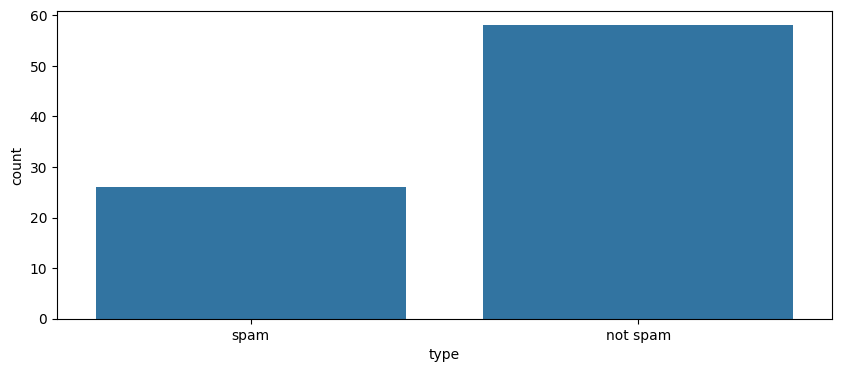

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='type',data=df)

In [ ]:
df['title'].nunique()

78

# **Preprocessing**

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df[['title','text']] = df[['title','text']].apply(lambda x:clean_text(x))
df.head()

<ipython-input-16-2057e431fd69>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[['title','text']] = df[['title','text']].apply(lambda x:clean_text(x))


,title,text,type
0,the secrets to ...,hi jamesnnhave you claim your naltte...,spam
1,the secrets to ...,hi jamesnnhave you claim your naltte...,not spam
2,the secrets to ...,hi jamesnnhave you claim your naltte...,not spam
3,the secrets to ...,hi jamesnnhave you claim your naltte...,not spam
4,the secrets to ...,hi jamesnnhave you claim your naltte...,spam


In [ ]:
stop_words = ["the", "and", "is", "in", "to", "for", "of"]
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [ ]:
x = df[['text','title']]
y = df['type']

In [ ]:
#Creation of encoding related to train dataset
x_bow = bow_counts.fit_transform(x.fillna(''))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# **Classification & Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [ ]:
x_train.shape

(56, 2)

In [ ]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(x_train)
x_train = ordinal_encoder.transform(x_train)
x_test = ordinal_encoder.transform(x_test)

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.6607142857142857

In [ ]:
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_curve

In [ ]:
print('accuracy:',accuracy_score(y_test, predictions))
print('precision:',precision_score(y_test, predictions))
print('f1_score:',f1_score(y_test, predictions))
print('recall:',recall_score(y_test, predictions))

accuracy: 0.75
precision: 0.0
f1_score: 0.0
recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(confusion_matrix(y_test, predictions))

[[21  0]
 [ 7  0]]


In [ ]:
sensitivity_score = recall_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
print(precision_recall_fscore_support(y_test, predictions))

(array([0.75, 0.  ]), array([1., 0.]), array([0.85714286, 0.        ]), array([21,  7]))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
def specificity_score(y_true, predictions):
                      p,r,f,s = precision_recall_fscore_support(y_true, predictions)
                      return r[0]
print('specificity_score:',specificity_score(y_test, predictions))

specificity_score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
prob= model.predict_proba(x_test)
fpr, tpr,thresholds = roc_curve(y_test, prob[:,1])

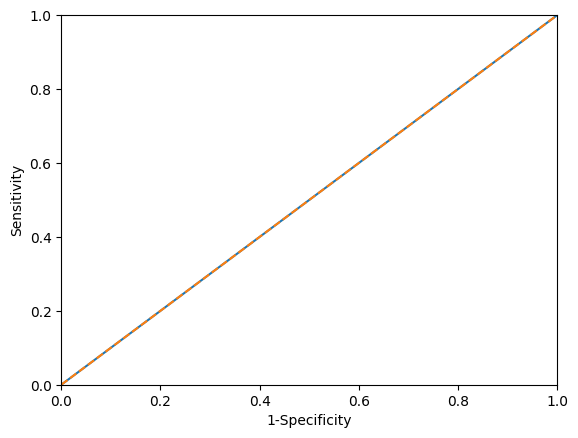

In [ ]:
plt.plot(fpr,tpr)  # to plot the roc curve
plt.plot([0,1],[0,1],linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()